**1. Import Data**

In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv('users_data.csv')

In [3]:
# View first 5 rows
df.head()

,id,current_age,retirement_age,birth_year,birth_month,gender,address,latitude,longitude,per_capita_income,yearly_income,total_debt,credit_score,num_credit_cards
0,825,53,66,1966,11,Female,462 Rose Lane,34.15,-117.76,$29278,$59696,$127613,787,5
1,1746,53,68,1966,12,Female,3606 Federal Boulevard,40.76,-73.74,$37891,$77254,$191349,701,5
2,1718,81,67,1938,11,Female,766 Third Drive,34.02,-117.89,$22681,$33483,$196,698,5
3,708,63,63,1957,1,Female,3 Madison Street,40.71,-73.99,$163145,$249925,$202328,722,4
4,1164,43,70,1976,9,Male,9620 Valley Stream Drive,37.76,-122.44,$53797,$109687,$183855,675,1


In [4]:
# Dataset overview
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 2000 non-null   int64  
 1   current_age        2000 non-null   int64  
 2   retirement_age     2000 non-null   int64  
 3   birth_year         2000 non-null   int64  
 4   birth_month        2000 non-null   int64  
 5   gender             2000 non-null   object 
 6   address            2000 non-null   object 
 7   latitude           2000 non-null   float64
 8   longitude          2000 non-null   float64
 9   per_capita_income  2000 non-null   object 
 10  yearly_income      2000 non-null   object 
 11  total_debt         2000 non-null   object 
 12  credit_score       2000 non-null   int64  
 13  num_credit_cards   2000 non-null   int64  
dtypes: float64(2), int64(7), object(5)
memory usage: 218.9+ KB


In [5]:
# Check for missing values
df.isnull().sum()

,0
id,0
current_age,0
retirement_age,0
birth_year,0
birth_month,0
gender,0
address,0
latitude,0
longitude,0
per_capita_income,0


In [6]:
# Summary statistics
df.describe()

,id,current_age,retirement_age,birth_year,birth_month,latitude,longitude,credit_score,num_credit_cards
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,999.500000,45.391500,66.237500,1973.803000,6.439000,37.389225,-91.554765,709.734500,3.073000
std,577.494589,18.414092,3.628867,18.421234,3.565338,5.114324,16.283293,67.221949,1.637379
min,0.000000,18.000000,50.000000,1918.000000,1.000000,20.880000,-159.410000,480.000000,1.000000
25%,499.750000,30.000000,65.000000,1961.000000,3.000000,33.837500,-97.395000,681.000000,2.000000
50%,999.500000,44.000000,66.000000,1975.000000,7.000000,38.250000,-86.440000,711.500000,3.000000
75%,1499.250000,58.000000,68.000000,1989.000000,10.000000,41.200000,-80.130000,753.000000,4.000000
max,1999.000000,101.000000,79.000000,2002.000000,12.000000,61.200000,-68.670000,850.000000,9.000000


In [7]:
# Check for duplicate rows
df.duplicated().sum()

np.int64(0)

In [8]:
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter

# Initialize Geolocator
geolocator = Nominatim(user_agent="geoapi")

# Add delay between requests to avoid getting blocked
reverse = RateLimiter(geolocator.reverse, min_delay_seconds=1)

# Function to get country from lat & lon
def get_country(lat, lon):
    try:
        location = reverse((lat, lon))
        if location and 'country' in location.raw['address']:
            return location.raw['address']['country']
        else:
            return None
    except:
        return None

# Apply the function to each row
df['Country'] = df.apply(lambda row: get_country(row['latitude'], row['longitude']), axis=1)

# Save the new file
df.to_csv('users_data.csv', index=False)

print("Country column added successfully!")



Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/urllib3/connection.py", line 198, in _new_conn
    sock = connection.create_connection(
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/urllib3/util/connection.py", line 85, in create_connection
    raise err
  File "/usr/local/lib/python3.11/dist-packages/urllib3/util/connection.py", line 73, in create_connection
    sock.connect(sa)
TimeoutError: timed out

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/urllib3/connectionpool.py", line 787, in urlopen
    response = self._make_request(
               ^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/urllib3/connectionpool.py", line 488, in _make_request
    raise new_e
  File "/usr/local/lib/python3.11/dist-packages/urllib3/connectionpool.py", line 464, in _make_request
    self._validate_c

Country column added successfully!


In [9]:
df.head()

,id,current_age,retirement_age,birth_year,birth_month,gender,address,latitude,longitude,per_capita_income,yearly_income,total_debt,credit_score,num_credit_cards,Country
0,825,53,66,1966,11,Female,462 Rose Lane,34.15,-117.76,$29278,$59696,$127613,787,5,United States
1,1746,53,68,1966,12,Female,3606 Federal Boulevard,40.76,-73.74,$37891,$77254,$191349,701,5,United States
2,1718,81,67,1938,11,Female,766 Third Drive,34.02,-117.89,$22681,$33483,$196,698,5,United States
3,708,63,63,1957,1,Female,3 Madison Street,40.71,-73.99,$163145,$249925,$202328,722,4,United States
4,1164,43,70,1976,9,Male,9620 Valley Stream Drive,37.76,-122.44,$53797,$109687,$183855,675,1,United States


In [11]:
df['Country'].value_counts()

,count
Country,
United States,2000


**Visualizing User Density (Heatmaps)**

In [13]:
import folium
import pandas as pd
from folium.plugins import HeatMap

# Create a Map
m = folium.Map(location=[0, 0], zoom_start=2)

# Prepare Data for Heatmap (List of Lat/Lng pairs)
heat_data = [[row['latitude'], row['longitude']] for index, row in df.iterrows()]

# Create Heatmap Layer
HeatMap(heat_data).add_to(m)

m.save('user_heatmap.html')

**Scatter Plot (Longitude vs. Latitude)**


User Distribution

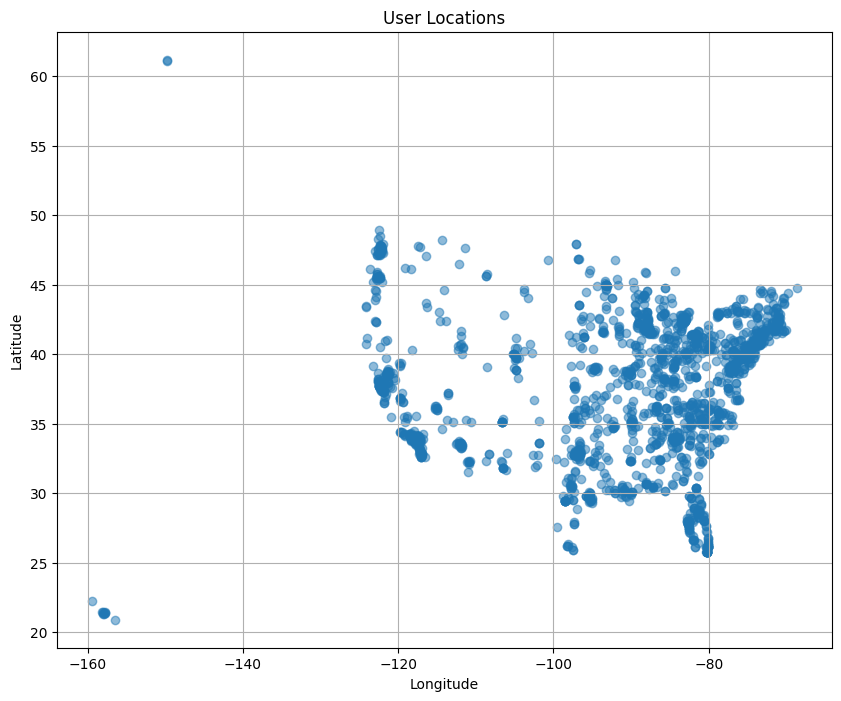

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))  # Adjust figure size as needed
plt.scatter(df['longitude'], df['latitude'], alpha=0.5)  # alpha for transparency
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('User Locations')
plt.grid(True)
plt.show()

**Gender Distribution**

gender
Female    1016
Male       984
Name: count, dtype: int64


<ipython-input-16-e7007b7bb882>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='gender', data=df, palette='Set2')


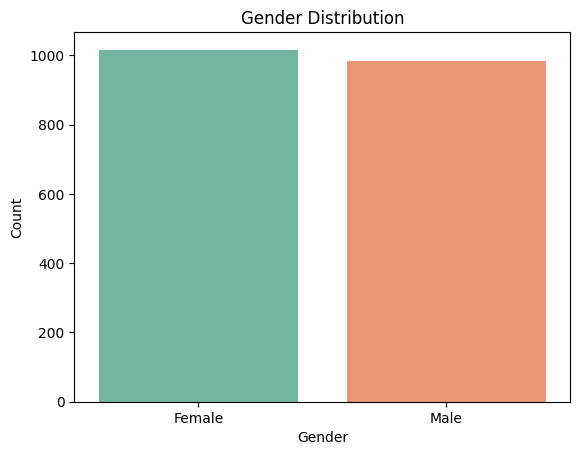

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Gender Distribution
gender_counts = df['gender'].value_counts()
print(gender_counts)

# Plotting Gender Distribution
sns.countplot(x='gender', data=df, palette='Set2')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

In [17]:
# Summary statistics grouped by gender (e.g., income, debt, credit score)
gender_summary = df.groupby('gender')[['yearly_income', 'total_debt', 'credit_score']].describe()
print(gender_summary)

       credit_score                                                           
              count        mean        std    min    25%    50%     75%    max
gender                                                                        
Female       1016.0  709.172244  67.599858  480.0  679.0  710.0  752.00  850.0
Male          984.0  710.315041  66.858913  488.0  681.0  712.0  753.25  850.0


**Per Capita Income and Total Debt Analysis:**

Check if individuals with higher per_capita_income tend to have higher debt
levels.

In [25]:
# Clean Income & Debt Columns
df['per_capita_income'] = df['per_capita_income'].replace('[\$,]', '', regex=True).astype(float)
df['total_debt'] = df['total_debt'].replace('[\$,]', '', regex=True).astype(float)


Correlation between Per Capita Income and Total Debt: 0.50


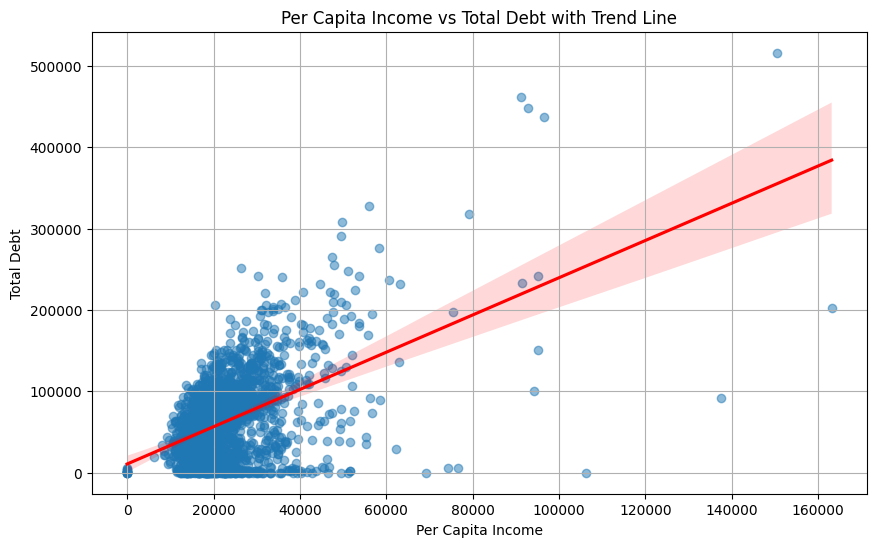

In [26]:
# Correlation after cleaning
correlation = df['per_capita_income'].corr(df['total_debt'])
print(f"Correlation between Per Capita Income and Total Debt: {correlation:.2f}")

# Improved Visualization: Scatter with alpha & Trend line
plt.figure(figsize=(10, 6))
sns.regplot(data=df,
            x='per_capita_income',
            y='total_debt',
            scatter_kws={'alpha':0.5},  # Reduce dot opacity
            line_kws={"color": "red"})
plt.title('Per Capita Income vs Total Debt with Trend Line')
plt.xlabel('Per Capita Income')
plt.ylabel('Total Debt')
plt.grid(True)
plt.show()


**CREDIT SCORE VS TOTAL DEBT ANALYSIS**

***(Hypothesis: Lower Credit Score → Higher Debt) ***

In [32]:
# Clean total_debt if not already done
df['total_debt'] = df['total_debt'].replace('[\$,]', '', regex=True).astype(float)

# Ensure credit_score is numeric
df['credit_score'] = pd.to_numeric(df['credit_score'], errors='coerce')

# Remove dollar sign and commas, then convert to numeric
df['yearly_income'] = df['yearly_income'].replace({'\$': '', ',': ''}, regex=True).astype(float)


**Correlation Check**

**Interpretation:**

Correlation close to -1 → Strong negative relationship

Closer to 0 → Weak/no linear relationship

In [28]:
correlation = df['credit_score'].corr(df['total_debt'])
print(f"Correlation between Credit Score and Total Debt: {correlation:.2f}")


Correlation between Credit Score and Total Debt: -0.10


**Visualization**

<ipython-input-30-37f7930c48dc>:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_debt = df.groupby('credit_score_group')['total_debt'].mean().reset_index()
<ipython-input-30-37f7930c48dc>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_debt, x='credit_score_group', y='total_debt', palette='viridis')


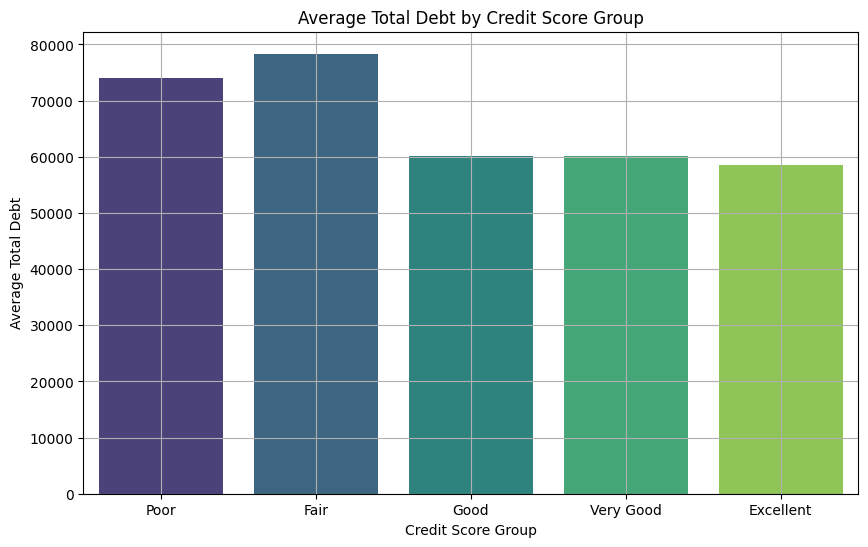

In [30]:
# Create Credit Score Groups
bins = [300, 579, 669, 739, 799, 850]
labels = ['Poor', 'Fair', 'Good', 'Very Good', 'Excellent']

df['credit_score_group'] = pd.cut(df['credit_score'], bins=bins, labels=labels)

# Bar Plot
plt.figure(figsize=(10, 6))
avg_debt = df.groupby('credit_score_group')['total_debt'].mean().reset_index()

sns.barplot(data=avg_debt, x='credit_score_group', y='total_debt', palette='viridis')
plt.title('Average Total Debt by Credit Score Group')
plt.xlabel('Credit Score Group')
plt.ylabel('Average Total Debt')
plt.grid(True)
plt.show()


**CREDIT BEHAVIOR**

**No of credit cards - Analyze how the number of credit cards (num_credit_cards) correlates with financial variables such as income, debt, and credit score.**

In [33]:
# Calculate correlations with number of credit cards
correlation_income = df['num_credit_cards'].corr(df['yearly_income'])
correlation_debt = df['num_credit_cards'].corr(df['total_debt'])
correlation_credit_score = df['num_credit_cards'].corr(df['credit_score'])

print(f"Correlation between Number of Credit Cards and Yearly Income: {correlation_income:.2f}")
print(f"Correlation between Number of Credit Cards and Total Debt: {correlation_debt:.2f}")
print(f"Correlation between Number of Credit Cards and Credit Score: {correlation_credit_score:.2f}")


Correlation between Number of Credit Cards and Yearly Income: -0.03
Correlation between Number of Credit Cards and Total Debt: -0.22
Correlation between Number of Credit Cards and Credit Score: 0.24


<ipython-input-42-729d8cd625a1>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_values, x='num_credit_cards_bin', y='yearly_income', ax=axes[0], palette='viridis')
<ipython-input-42-729d8cd625a1>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_values, x='num_credit_cards_bin', y='total_debt', ax=axes[1], palette='viridis')
<ipython-input-42-729d8cd625a1>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_values, x='num_credit_cards_bin', y='credit_score', ax=axes[2], palette='viridis')


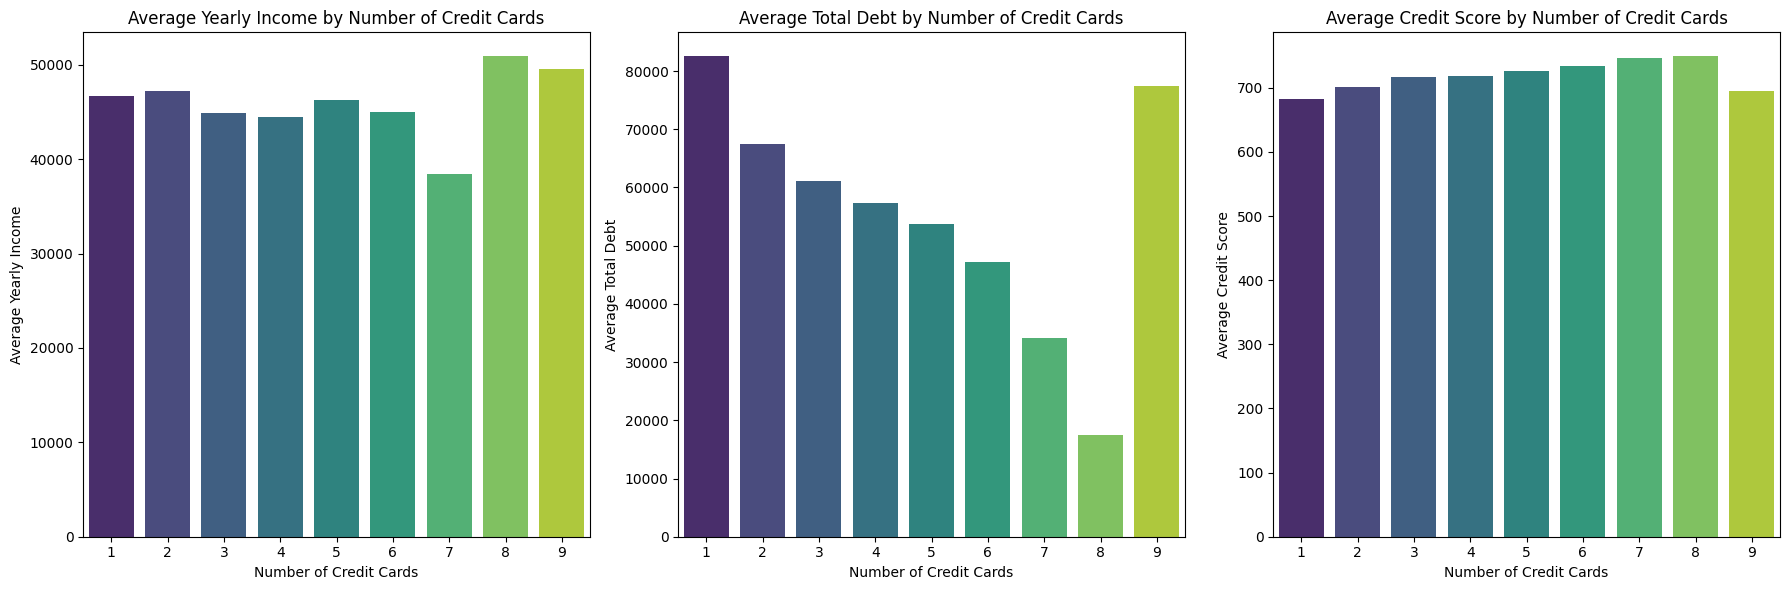

In [42]:
# Binning num_credit_cards for each unique value (1 to 9)
labels = ['1', '2', '3', '4', '5', '6', '7', '8', '9']
df['num_credit_cards_bin'] = df['num_credit_cards'].astype(str)

# Calculate average values for the financial variables within each bin of num_credit_cards
avg_values = df.groupby('num_credit_cards_bin')[['yearly_income', 'total_debt', 'credit_score']].mean().reset_index()

# Plot bar plot for each financial variable
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Bar plot for Average Yearly Income
sns.barplot(data=avg_values, x='num_credit_cards_bin', y='yearly_income', ax=axes[0], palette='viridis')
axes[0].set_title('Average Yearly Income by Number of Credit Cards')
axes[0].set_xlabel('Number of Credit Cards')
axes[0].set_ylabel('Average Yearly Income')

# Bar plot for Average Total Debt
sns.barplot(data=avg_values, x='num_credit_cards_bin', y='total_debt', ax=axes[1], palette='viridis')
axes[1].set_title('Average Total Debt by Number of Credit Cards')
axes[1].set_xlabel('Number of Credit Cards')
axes[1].set_ylabel('Average Total Debt')

# Bar plot for Average Credit Score
sns.barplot(data=avg_values, x='num_credit_cards_bin', y='credit_score', ax=axes[2], palette='viridis')
axes[2].set_title('Average Credit Score by Number of Credit Cards')
axes[2].set_xlabel('Number of Credit Cards')
axes[2].set_ylabel('Average Credit Score')

plt.tight_layout()
plt.show()
